# Movie Correlations

Evaluating what features of a movie has an effect on gross revenue.

Also evaluating which star actors have the highest grossing films.

Data includes over 7,500 Movies with three decades of movie data (1986-2016), scraped from IMDb using Python.

In [43]:
# Import libraries 
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure 

In [3]:
# import data

df = pd.read_csv(r"C:\Users\jdgoe\OneDrive\Documents\Analysis\movies.csv")

In [4]:
# view data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
# look for missing data 

missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(missing_data[column].value_counts())

False    7668
Name: name, dtype: int64
False    7591
True       77
Name: rating, dtype: int64
False    7668
Name: genre, dtype: int64
False    7668
Name: year, dtype: int64
False    7666
True        2
Name: released, dtype: int64
False    7665
True        3
Name: score, dtype: int64
False    7665
True        3
Name: votes, dtype: int64
False    7668
Name: director, dtype: int64
False    7665
True        3
Name: writer, dtype: int64
False    7667
True        1
Name: star, dtype: int64
False    7665
True        3
Name: country, dtype: int64
False    5497
True     2171
Name: budget, dtype: int64
False    7479
True      189
Name: gross, dtype: int64
False    7651
True       17
Name: company, dtype: int64
False    7664
True        4
Name: runtime, dtype: int64


In [6]:
# remove null rows for categories of interest
df.dropna(axis=0, how="any", thresh=None, subset=['budget', 'gross', 'votes'], inplace=True)

In [7]:
# check data types

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
# turn budget, gross, and votes into integer

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')

In [9]:
# sort by gross revenue

df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0
2417,Madadayo,NaN,Drama,1993,"April 17, 1993 (Japan)",7.3,5100,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0


## Check for Correlations

Text(0, 0.5, 'Gross Revenue (Millions)')

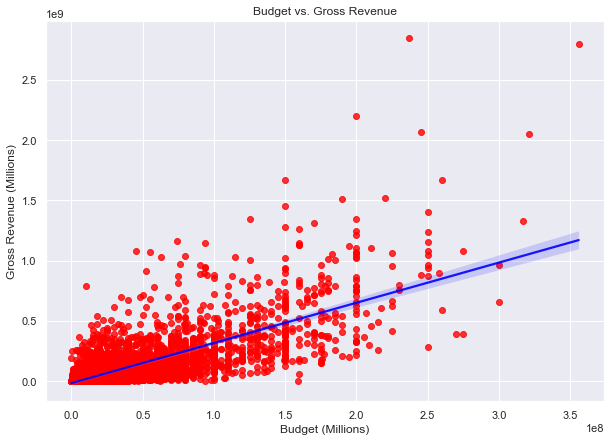

In [45]:
# reg plot with budget vs gross revenue
sns.set(style = 'darkgrid')
plt.figure(figsize=(10,7))
bg = sns.regplot(x="budget", y="gross", data=df, color = 'red', line_kws={'color':'blue','alpha':0.9})
plt.title('Budget vs. Gross Revenue')
plt.xlabel('Budget (Millions)')
plt.ylabel('Gross Revenue (Millions)')

In [38]:
# look at numerical correlations

df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.055174,0.205758,0.327781,0.274264,0.074203
score,0.055174,1.000000,0.473809,0.071792,0.222143,0.414580
votes,0.205758,0.473809,1.000000,0.440021,0.614904,0.352437
budget,0.327781,0.071792,0.440021,1.000000,0.740395,0.318595
gross,0.274264,0.222143,0.614904,0.740395,1.000000,0.275596
runtime,0.074203,0.414580,0.352437,0.318595,0.275596,1.000000


Text(84.453125, 0.5, 'Movie Features')

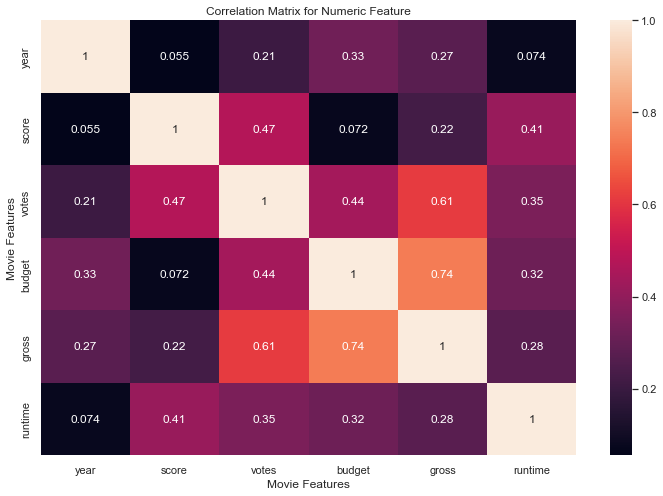

In [46]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Feature')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [48]:
#numerize non-numerical categories

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4706,6,6,1980,1308,8.4,927000,1800,2841,700,46,19000000,46998772,1432,146.0
1,3943,6,1,1980,1131,5.8,65000,1581,1160,215,47,4500000,58853106,454,104.0
2,3654,4,0,1980,1363,8.7,1200000,759,1822,1161,47,18000000,538375067,949,124.0
3,205,4,4,1980,1131,7.7,221000,891,1416,1478,47,3500000,83453539,1114,88.0
4,734,6,4,1980,1174,7.3,108000,721,352,272,47,6000000,39846344,1089,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,416,6,0,2020,907,6.6,140000,17,2397,1819,47,90000000,426505244,454,124.0
7649,3569,4,0,2020,715,6.5,102000,854,2316,148,47,85000000,319715683,1114,99.0
7650,1156,4,1,2020,907,5.6,53000,1814,2836,1474,47,175000000,245487753,1403,101.0
7651,3992,4,1,2020,760,6.8,42000,296,2096,641,6,135000000,111105497,12,100.0


In [49]:
df.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.023013,0.009617,0.024435,-0.005896,0.014955,0.012915,0.013699,0.011602,-0.007109,-0.024555,0.023698,0.005966,0.021209,0.010800
rating,-0.023013,1.000000,0.128102,0.022668,0.018836,0.059550,0.009255,0.014847,-0.006923,0.003737,0.020148,-0.186892,-0.168814,-0.082189,0.133239
genre,0.009617,0.128102,1.000000,-0.073026,0.021712,0.034061,-0.136457,-0.009303,0.017500,0.002619,-0.010847,-0.368900,-0.244380,-0.073293,-0.060186
year,0.024435,0.022668,-0.073026,1.000000,-0.001481,0.055174,0.205758,-0.036936,-0.024568,-0.032770,-0.066662,0.327781,0.274264,-0.013062,0.074203
released,-0.005896,0.018836,0.021712,-0.001481,1.000000,0.046424,0.029029,0.003341,0.008514,0.015363,-0.017231,0.019888,0.008614,-0.002927,0.008619
score,0.014955,0.059550,0.034061,0.055174,0.046424,1.000000,0.473809,0.005573,0.012860,0.009121,-0.044690,0.071792,0.222143,0.021054,0.414580
votes,0.012915,0.009255,-0.136457,0.205758,0.029029,0.473809,1.000000,-0.010198,-0.005394,-0.017140,0.042146,0.440021,0.614904,0.119366,0.352437
director,0.013699,0.014847,-0.009303,-0.036936,0.003341,0.005573,-0.010198,1.000000,0.262940,0.036289,0.011108,-0.009340,-0.029366,-0.007337,0.018082
writer,0.011602,-0.006923,0.017500,-0.024568,0.008514,0.012860,-0.005394,0.262940,1.000000,0.019273,0.022153,-0.039420,-0.035999,-0.002658,-0.016672
star,-0.007109,0.003737,0.002619,-0.032770,0.015363,0.009121,-0.017140,0.036289,0.019273,1.000000,-0.010135,-0.021282,-0.000009,0.015086,0.012439


Text(84.453125, 0.5, 'Movie Features')

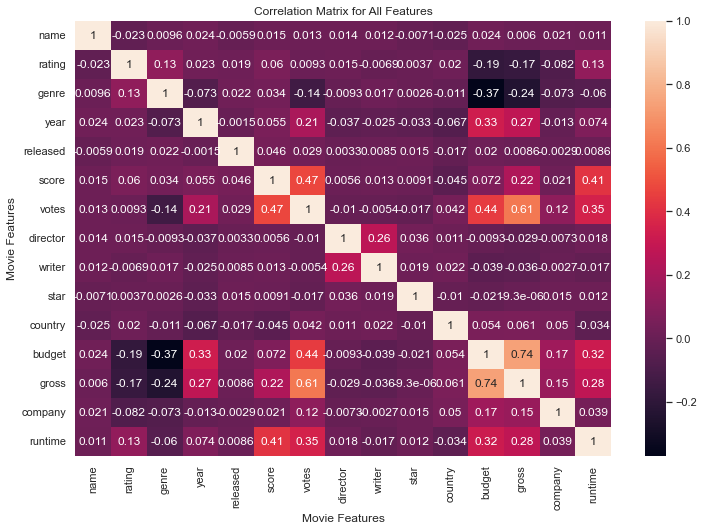

In [50]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for All Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [54]:
# sorted table for correlation 
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre    budget    -0.368900
budget   genre     -0.368900
genre    gross     -0.244380
gross    genre     -0.244380
rating   budget    -0.186892
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [56]:
# Table high correlations
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross     votes       0.614904
votes     gross       0.614904
budget    gross       0.740395
gross     budget      0.740395
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

Create data frame and view difference of revenue based on the movie star

In [57]:
star_frame = pd.read_csv(r"C:\Users\jdgoe\OneDrive\Documents\Analysis\movies.csv")

In [60]:
sf = star_frame[['star', 'gross', 'votes']]

In [61]:
sf

,star,gross,votes
0,Jack Nicholson,46998772.0,927000.0
1,Brooke Shields,58853106.0,65000.0
2,Mark Hamill,538375067.0,1200000.0
3,Robert Hays,83453539.0,221000.0
4,Chevy Chase,39846344.0,108000.0
...,...,...,...
7663,Shannon Bond,NaN,18.0
7664,Michael Saquella,NaN,36.0
7665,Onyama Laura,NaN,29.0
7666,Christina Roz,NaN,NaN


In [66]:
# remove null rows
sf.dropna(axis=0, how="any", thresh=None, subset=['star', 'gross', 'votes'], inplace=True)
sf

C:\Users\jdgoe\AppData\Local\Temp\ipykernel_41636\4092243603.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf.dropna(axis=0, how="any", thresh=None, subset=['star', 'gross', 'votes'], inplace=True)


,star,gross,votes
0,Jack Nicholson,46998772.0,927000.0
1,Brooke Shields,58853106.0,65000.0
2,Mark Hamill,538375067.0,1200000.0
3,Robert Hays,83453539.0,221000.0
4,Chevy Chase,39846344.0,108000.0
...,...,...,...
7648,Will Smith,426505244.0,140000.0
7649,Ben Schwartz,319715683.0,102000.0
7650,Robert Downey Jr.,245487753.0,53000.0
7651,Harrison Ford,111105497.0,42000.0


In [67]:
#turn votes and gross into integers
sf['gross'] = sf['gross'].astype('int64')
sf['votes'] = sf['votes'].astype('int64')

C:\Users\jdgoe\AppData\Local\Temp\ipykernel_41636\1962490861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf['gross'] = sf['gross'].astype('int64')
C:\Users\jdgoe\AppData\Local\Temp\ipykernel_41636\1962490861.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf['votes'] = sf['votes'].astype('int64')


In [83]:
sf

,star,gross,votes
0,Jack Nicholson,46998772,927000
1,Brooke Shields,58853106,65000
2,Mark Hamill,538375067,1200000
3,Robert Hays,83453539,221000
4,Chevy Chase,39846344,108000
...,...,...,...
7648,Will Smith,426505244,140000
7649,Ben Schwartz,319715683,102000
7650,Robert Downey Jr.,245487753,53000
7651,Harrison Ford,111105497,42000


In [93]:
sorted_sf = sf.sort_values(by="gross", ascending=False)
sorted_sf.head(20)

,star,gross,votes
5445,Sam Worthington,2847246203,1100000
7445,Robert Downey Jr.,2797501328,903000
3045,Leonardo DiCaprio,2201647264,1100000
6663,Daisy Ridley,2069521700,876000
7244,Robert Downey Jr.,2048359754,897000
7480,Donald Glover,1670727580,222000
6653,Chris Pratt,1670516444,593000
6043,Robert Downey Jr.,1518815515,1300000
6646,Vin Diesel,1515341399,370000
7494,Kristen Bell,1450026933,148000


Interesting to note Robert Downey Jr. has 5 of the top 20 highest grossing films from this data.

In [70]:
# find how often each actor appears
sf['star'].value_counts()

Nicolas Cage       40
Tom Hanks          38
Robert De Niro     38
Tom Cruise         34
Bruce Willis       34
                   ..
Robin Shou          1
Mira Sorvino        1
Djimon Hounsou      1
Stephen Fry         1
Zhi-zhong Huang     1
Name: star, Length: 1852, dtype: int64

In [78]:
mg = sf.groupby(['star']).mean()
mg

,gross,votes
star,,
'Weird Al' Yankovic,6157157.0,27000.000000
50 Cent,46563961.0,45000.000000
A.J. Cook,90941129.0,156000.000000
Aaliyah,45479110.0,53000.000000
Aamir Khan,5277766.0,40000.000000
...,...,...
Ziyi Zhang,162242962.0,141000.000000
Zoe Margaret Colletti,104545505.0,66000.000000
Zoe Saldana,71508440.0,97000.000000


In [87]:
#sort values by descending order
sorted_mg = mg.sort_values(by="gross", ascending=False)

## Top 20 Actors for gross by film

In [106]:
sorted_mg.head(20)

,gross,votes
star,,
Donald Glover,1.670728e+09,222000.0
Daisy Ridley,1.120174e+09,464875.0
Ellen DeGeneres,1.028571e+09,250000.0
Tom Holland,1.006047e+09,449500.0
Neel Sethi,9.665549e+08,264000.0
Craig T. Nelson,9.381233e+08,468000.0
Rami Malek,9.119026e+08,476000.0
Chris Pratt,8.797427e+08,492500.0
Louis C.K.,8.754586e+08,188000.0
